# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1:Amir 6937
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the train and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Display the first 5 rows of the train and test datasets
print("First 5 rows of the train dataset:")
print(train_df.head())

print("\nFirst 5 rows of the test dataset:")
print(test_df.head())

First 5 rows of the train dataset:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

First 5 rows of the test dataset:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


Basic statistics of the train dataset:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%    

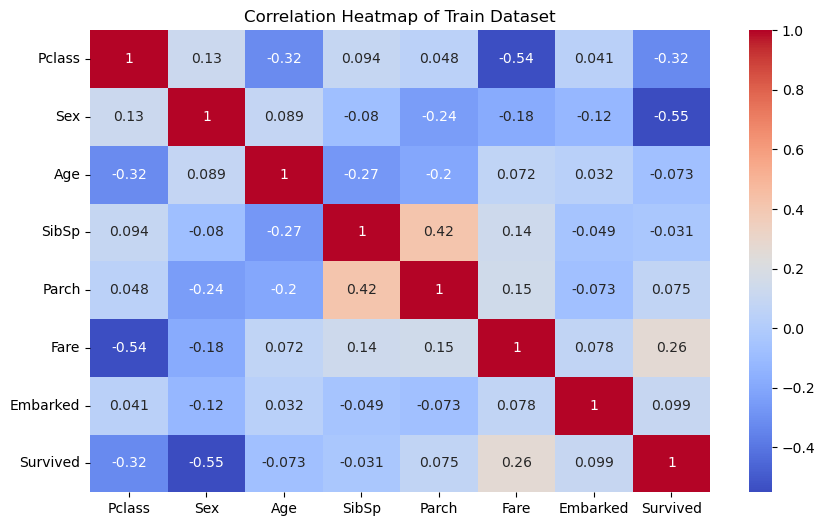

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


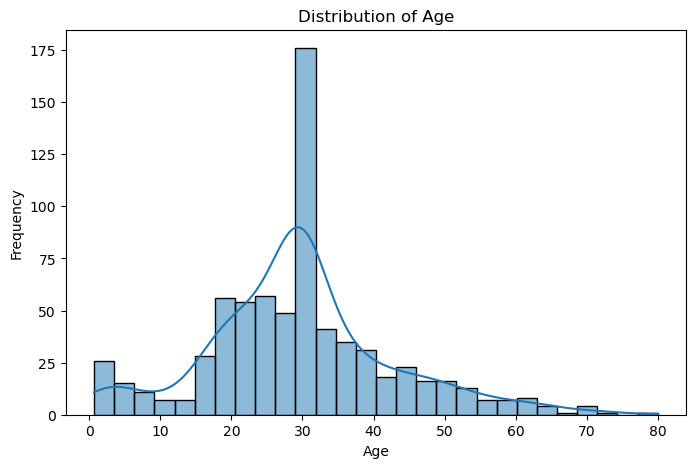

In [5]:

# Display basic statistics of the train dataset
print("Basic statistics of the train dataset:")
print(train_df.describe())

# Visualization 1: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Train Dataset')
plt.show()

# Visualization 2: Distribution of 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [18]:
import warnings
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [19]:
# Define the feature set and target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Define a simple pipeline with feature scaling and imputation
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Define the parameter grid
param_grid = [
    {
        'model': [LogisticRegression()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear']
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3, 5, 7, 10],
        'model__min_samples_split': [2, 5, 10]
    }
]

# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Show the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (F1 Macro): ", grid_search.best_score_)



Best parameters found:  {'model': DecisionTreeClassifier(max_depth=3), 'model__max_depth': 3, 'model__min_samples_split': 2}
Best cross-validation score (F1 Macro):  0.7956362318272125


In [20]:
# Suppress future warnings related to sparse_output
warnings.filterwarnings('ignore', category=FutureWarning)

# Define feature engineering variations
feature_engineering_steps = [
    {
        'imputer': SimpleImputer(strategy='mean'),
        'scaler': StandardScaler(),
        'encoder': 'passthrough'  # No encoding as features are already numeric
    },
    {
        'imputer': SimpleImputer(strategy='median'),
        'scaler': MinMaxScaler(),
        'encoder': 'passthrough'
    },
    {
        'imputer': SimpleImputer(strategy='mean'),
        'scaler': RobustScaler(),
        'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated parameter
    }
]

# Create a list to store results
results = []

# Loop over different feature engineering combinations
for steps in feature_engineering_steps:
    # Define column transformer for feature engineering
    preprocessor = ColumnTransformer(transformers=[
        ('num', Pipeline([
            ('imputer', steps['imputer']),
            ('scaler', steps['scaler'])
        ]), ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),  # Numerical columns
        ('cat', steps['encoder'], ['Sex', 'Embarked'])  # Categorical columns
    ])
    
    # Define pipeline with feature engineering and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier(max_depth=3, min_samples_split=2))
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')
    mean_score = scores.mean()
    
    # Save the results
    results.append({
        'Imputer': steps['imputer'].strategy,
        'Scaler': type(steps['scaler']).__name__,
        'Encoder': type(steps['encoder']).__name__ if steps['encoder'] != 'passthrough' else 'None',
        'F1 Score': mean_score
    })

# Display the results
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

results_df

,Imputer,Scaler,Encoder,F1 Score
0,mean,StandardScaler,None,0.795636
1,median,MinMaxScaler,None,0.795636
2,mean,RobustScaler,OneHotEncoder,0.794271


In [21]:
# Ensure the best feature engineering setup from previous steps
best_feature_engineering = {
    'imputer': SimpleImputer(strategy='mean'),
    'scaler': StandardScaler(),
    'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False)
}

# Define the preprocessor with the best feature engineering steps
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', best_feature_engineering['imputer']),
        ('scaler', best_feature_engineering['scaler'])
    ]), ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),  # Numerical columns
    ('cat', best_feature_engineering['encoder'], ['Sex', 'Embarked'])  # Categorical columns
])

# Define the model parameters with increased max_iter for Logistic Regression
model_params = [
    {
        'model': LogisticRegression(max_iter=500),  # Further increased max_iter
        'params': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__solver': ['liblinear']  # Using liblinear solver
        }
    },
    {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [3, 5, 7, 10],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [5, 10, 15],
            'model__min_samples_split': [2, 5, 10]
        }
    }
]

# Re-run the experiment with updated parameters
model_results = []

for entry in model_params:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', entry['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, entry['params'], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    model_results.append({
        'Model': type(entry['model']).__name__,
        'Best Params': grid_search.best_params_,
        'Best F1 Score': grid_search.best_score_
    })

# Convert results to DataFrame and display sorted by Best F1 Score
model_results_df = pd.DataFrame(model_results)
model_results_df.sort_values(by='Best F1 Score', ascending=False, inplace=True)

# Display the results
print(model_results_df)



                    Model                                        Best Params  \
2  RandomForestClassifier  {'model__max_depth': 10, 'model__min_samples_s...   
1  DecisionTreeClassifier  {'model__max_depth': 3, 'model__min_samples_le...   
0      LogisticRegression      {'model__C': 1, 'model__solver': 'liblinear'}   

   Best F1 Score  
2       0.819507  
1       0.797344  
0       0.789729  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [13]:
from sklearn.metrics import f1_score, accuracy_score

In [15]:
# Extract the best model and parameters from the results
best_model_entry = model_results_df.iloc[0]
best_model_name = best_model_entry['Model']
best_params = best_model_entry['Best Params']

# Correctly map the parameters to the models
if best_model_name == 'LogisticRegression':
    final_model = LogisticRegression(**{key.split('__')[1]: value for key, value in best_params.items()})
elif best_model_name == 'DecisionTreeClassifier':
    final_model = DecisionTreeClassifier(**{key.split('__')[1]: value for key, value in best_params.items()})
elif best_model_name == 'RandomForestClassifier':
    final_model = RandomForestClassifier(**{key.split('__')[1]: value for key, value in best_params.items()})

# Create a pipeline with the best preprocessor and the final model
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', final_model)
])

# Train the final model on the entire training set
final_pipeline.fit(X_train, y_train)

# Prepare the test set
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

# Predict on the test set
y_pred = final_pipeline.predict(X_test)

# Show the first 5 predictions
print("First 5 predictions on the test set:")
print(y_pred[:5])

# Evaluate the model's performance
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Test F1 Score (Macro): {f1}")
print(f"Test Accuracy: {accuracy}")


First 5 predictions on the test set:
[0 0 0 1 0]
Test F1 Score (Macro): 0.8512913129853712
Test Accuracy: 0.8715083798882681


## Part 5 - Apply on test and show model performance estimation

In [16]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [17]:
# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

# Display the first 5 predictions
print("First 5 predictions on the test set:")
print(y_pred[:5])

# Evaluate the model's performance
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Display evaluation metrics
print(f"Test F1 Score (Macro): {f1}")
print(f"Test Accuracy: {accuracy}")

# Display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display a detailed classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


First 5 predictions on the test set:
[0 0 0 1 0]
Test F1 Score (Macro): 0.8512913129853712
Test Accuracy: 0.8715083798882681

Confusion Matrix:
[[111   7]
 [ 16  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       118
           1       0.87      0.74      0.80        61

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179

